In [2]:
from py2neo import Graph
from py2neo import Node, Relationship

# neo4j graph connector
graph = Graph()
cypher = graph.cypher

In [48]:
result = cypher.execute("MATCH (x:Concept{id:'Num:C5:SC1:MC2'})<-[r]-(y:Concept) RETURN y.id")

In [50]:
print((result[1])["y.id"])

Num:C5:SC1


In [55]:
r=cypher.execute("MATCH path=shortestpath( (x:Concept{id:'Num:C5:SC1:MC2'}) -[r:isParentOf*..6]-(y:Concept{id:'numeracy'}) ) RETURN length(path) as d")

In [57]:
print(r[0].d)

3


In [59]:
import requests
url="http://lp-sandbox.ekstep.org:8080/taxonomy-service/v2/analytics/domain/map"
resp = requests.get(url).json()
# move all concepts
conceptList = resp["result"]["concepts"]

In [65]:
print conceptList[0]['objectType']

Domain


In [72]:
# from neo4j, get list of concepts and content and create "forced" mapping between them
A=cypher.execute("MATCH (x:Concept) RETURN x.id as concept")
B=cypher.execute("MATCH (x:Content) RETURN x.id as content")

In [82]:
B[1].content

u'org.ekstep.mar8.story'

In [77]:
import random;
random.randint(1,10)

3

In [83]:
print 2

2


In [84]:
%matplotlib inline

In [85]:
import csv
import sys
import collections
import os.path
import requests

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline


# on exit clean-ups
import atexit

# cassandra libs
from cassandra.cluster import Cluster
from cassandra.query import dict_factory


# neo4j libs
from py2neo import Graph
from py2neo import Node, Relationship

# neo4j graph connector
graph = Graph()
# delete entire graph


# bool flag database connections
cassandraDbOn=False
neo4jDbOn=False

def dbCleanUP(cassandraDbOn,neo4jDbOn):
    if cassandraDbOn:
    	print 'cleaning Cassandra state'
    	session.shutdown();
    	cluster.shutdown();

atexit.register(dbCleanUP,True,True)

# # read-csv learner proficiency table
# read_file = './data/CassandraLearnerProficiency.csv'

# # first pass to get the list of students and graders
# with open(read_file,'rb') as grade_file:
# 	for line in grade_file:
# 		line = line.rstrip()
# 		names = line.split(',')
		
# for name in names:
# 	print(name)


# setup cassandra connection
cassandraDbOn=True
cluster = Cluster()
session = cluster.connect('learner_db')

# set response schema to Dictionaries
session.row_factory = dict_factory


In [87]:
lids = session.execute("SELECT DISTINCT learner_id from learnerconceptrelevance")

-- above--- only KS
KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table
learner is:9a221916-3f2c-4a83-baef-28b10bbec9f7
concept relevancy scores:
top 10 recommended concepts are:
[(u'numeracy', 0.014550477230203827), (u'Num:C3', 0.012751711407475046), (u'Num:C4', 0.012474141279003127), (u'Num:C1', 0.01167472842847007), (u'Num:C2', 0.011432828782213356), (u'Num:C5', 0.0103051615546863), (u'Num:C3:SC1', 0.009216161134498973), (u'Num:C3:SC2', 0.008630555361020321), (u'Num:C3:SC3', 0.008630555361020321), (u'Num:C3:SC7', 0.008591513778599102)]
bottom 10 recommended concepts are:
[(u'LO26', 6.108052678090068e-06), (u'LO27', 6.974414798894649e-06), (u'LT05', 1.0856118094734877e-05), (u'LT01', 1.107708806583382e-05), (u'LT02', 1.107708806583382e-05), (u'LT03', 1.1920869458199398e-05), (u'LT04', 1.1920869458199398e-05), (u'LT06', 1.2358394771166798e-05), (u'LT09', 1.2358394771166798e-05), (u'LT07', 1.258563300934473e-05)]
top concepts:
[(u'Num:C4:SC4:MC11', 0.71), (u'Num:C3:SC2:

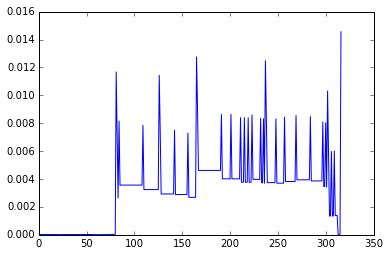

In [88]:
print("-- above--- only KS")
print("KS,P,TS: 1,1,1 below, TSP is derived from concept-proficiency table")
uid=(lids[6]['learner_id'])
print("learner is:"+uid)
relDict3 = session.execute("SELECT relevance from learnerconceptrelevance WHERE learner_id='" + uid + "'")[0]['relevance']
# read relevancy screo tables
y3 = relDict3.values()
print("concept relevancy scores:")
plt.plot(y3)
print("top 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1],reverse=True)[:10])
print("bottom 10 recommended concepts are:")
print(sorted(relDict3.items(), key=lambda x: x[1])[:10])

profDict = session.execute("SELECT proficiency from learnerproficiency WHERE learner_id='" + uid + "'")[0]['proficiency']
n=len(profDict)
if n>0:
    k=min(5,n)
    print("top concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1],reverse=True)[:k])
    print("bottom concepts:")
    print(sorted(profDict.items(), key=lambda x: x[1])[:k])